<a href="https://colab.research.google.com/github/Storm00212/Introduction-to-machine-learning-models/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳 Decision Trees Explained

In this notebook, we'll explore **Decision Trees**, one of the simplest yet most powerful algorithms in machine learning.

We'll go step-by-step from the concept to implementation and understand what **overfitting** means and how **pruning** helps fix it.

## 1️⃣ What is a Decision Tree?

A **Decision Tree** is a model that makes predictions by **splitting data into branches** based on feature values — just like a flowchart of decisions.

Each node asks a *question* about the data, and each branch represents a possible *answer*.

Example:
- Is petal length < 2.5 cm? → Yes → Setosa, No → check next question.

They are easy to understand and visualize, which makes them very popular for explaining model decisions.

## 2️⃣ Loading the Dataset

We'll use the classic **Iris dataset**, which contains measurements of flower petals and sepals for three species of iris: *Setosa*, *Versicolor*, and *Virginica*.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3️⃣ Splitting the Data

We'll split the dataset into **training** and **testing** sets.

- The **training set** is used to teach the model.
- The **testing set** is used to evaluate how well the model generalizes to unseen data.

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training data shape:', X_train.shape)
print('Testing data shape:', X_test.shape)

Training data shape: (120, 4)
Testing data shape: (30, 4)


## 4️⃣ Training a Decision Tree Model

We'll now train a **DecisionTreeClassifier** from Scikit-learn.

By default, the tree grows until every leaf is pure — meaning it fits the training data perfectly. This can lead to **overfitting**, which we'll discuss later.

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print('Model trained successfully!')

Model trained successfully!


## 5️⃣ Making Predictions and Checking Accuracy

After training, we can use the model to predict flower species on the **test data** and check how accurate it is.

In [4]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 1.00


## 6️⃣ Visualizing the Decision Tree

Let’s visualize how the decision tree splits the data.

Each node represents a decision rule based on a feature (e.g., petal width < 0.8 cm), and the leaves show the predicted class.

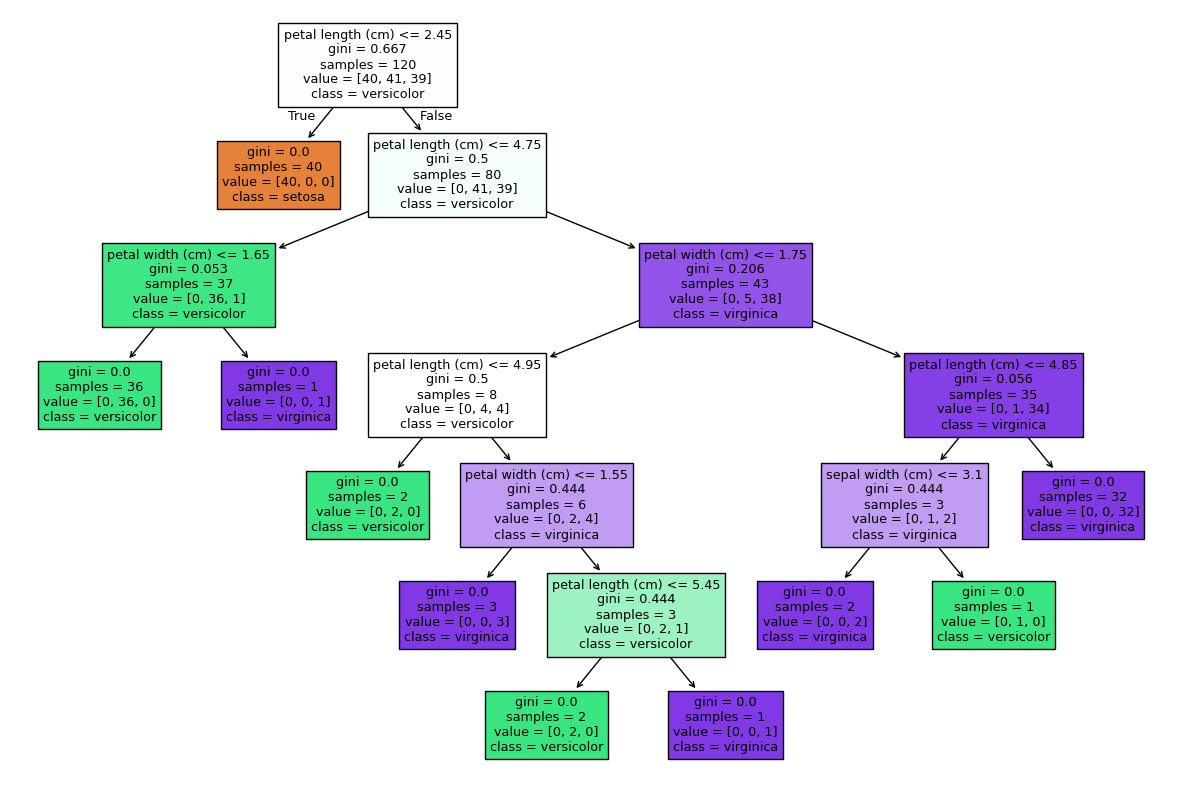

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True);
plt.show()

## 7️⃣ Understanding Overfitting

Decision Trees are **prone to overfitting** — meaning they may perform very well on training data but poorly on new, unseen data.

Overfitting happens when the tree becomes too complex and tries to memorize training examples rather than generalize patterns.

To prevent this, we can **prune** the tree by limiting its depth or the number of splits.

In [6]:
pruned_model = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_model.fit(X_train, y_train)

y_pruned = pruned_model.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pruned)

print(f'Pruned Tree Accuracy: {pruned_accuracy:.2f}')

Pruned Tree Accuracy: 1.00


## 8️⃣ Visualizing the Pruned Tree

Let’s visualize the **simpler tree** after pruning. Notice it’s smaller and easier to interpret — this usually helps it generalize better to new data.

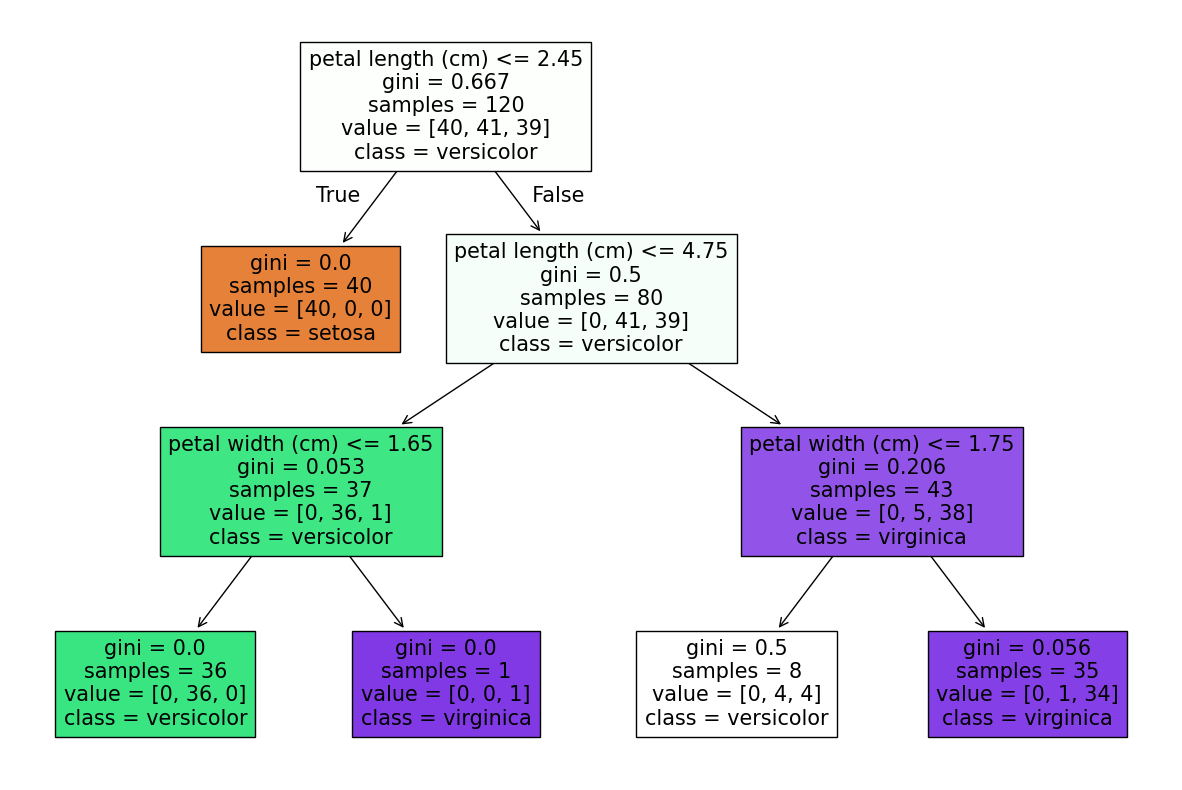

In [7]:
plt.figure(figsize=(15, 10))
plot_tree(pruned_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True);
plt.show()

## ✅ Summary

In this notebook, we covered:

1. What Decision Trees are and how they work.
2. How to train and visualize them.
3. The concept of **overfitting** and how **pruning** helps reduce it.

Next, we’ll explore **Random Forests** — an ensemble of many decision trees working together for improved performance. 🌲🌲🌲